In [1]:
# !pip install --upgrade seaborn
# pip show scikit-learn

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_sas("/Users/vidhya/Documents/Ironhack Data Analytics Bootcamp/Week 5/LLCP2022.XPT")
#df = pd.read_excel("Fitness-Plan-Excel-Template.xlsx")

In [4]:
df.shape

(445132, 326)

In [5]:
pd.set_option('display.max_rows', None)
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_SMOKGRP', '_LCSREC', 'DRNKANY6', 'DROCDY4_', '_RFBING6', '_DRNKWK2',
       '_RFDRHV8', '_FLSHOT7', '_PNEUMO3', '_AIDTST4'],
      dtype='object', length=326)

In [6]:
df.isnull().sum()

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
DISPCODE         0
SEQNO            0
_PSU             0
CTELENM1    349081
PVTRESD1    349082
COLGHOUS    445113
STATERE1    349082
CELPHON1    349080
LADULT1     349082
COLGSEX1    445111
NUMADULT    349100
LANDSEX1    401436
NUMMEN      394702
NUMWOMEN    394699
RESPSLCT    392879
SAFETIME     96051
CTELNUM1     96051
CELLFON5     96052
CADULT1      96052
CELLSEX1     96053
PVTRESD3     96058
CCLGHOUS    443807
CSTATE1      96060
LANDLINE     96061
HHADULT      96061
SEXVAR           0
GENHLTH          3
PHYSHLTH         5
MENTHLTH         3
POORHLTH    189386
PRIMINSR         4
PERSDOC3         2
MEDCOST1         4
CHECKUP1         3
EXERANY2         2
SLEPTIM1         3
LASTDEN4      1363
RMVTETH4      1363
CVDINFR4         4
CVDCRHD4         2
CVDSTRK3         2
ASTHMA3          2
ASTHNOW     378438
CHCSCNC1         2
CHCOCNC1         3
CHCCOPD3         2
ADDEPEV3    

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX1,NUMADULT,LANDSEX1,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX1,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,LASTDEN4,RMVTETH4,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSC1,LCSSCNCR,LCSCTWHN,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,TETANUS1,HIVTST7,HIVTSTD3,HIVRISK5,COVIDPOS,COVIDSMP,COVIDPRM,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,TOLDCFS,HAVECFS,WORKCFS,IMFVPLA3,HPVADVC4,HPVADSHT,SHINGLE2,COVIDVA1,COVIDNU1,COVIDFS1,COVIDSE1,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PSATEST1,PSATIME1,PCPSARS2,PSASUGST,PCSTALK1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,FIREARM5,GUNLOAD,LOADULK2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,HADSEX,PFPPRVN4,TYPCNTR9,BRTHCNT4,WHEREGET,NOBCUSE8,BCPREFER,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_DENVST3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_RFMAM22,_MAM5023,_HADCOLN,_CLNSCP1,_HADSIGM,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_SBONTI1,_CRCREC2,_SMOKER3,_RFSMOK3,_CURECI2,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,99.0,1.0,2.0,1.0,2.0,8.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,80.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,7.0,88.0,99.0,NaN,9999.0,9999.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,2.0,1.0,3.0,2.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,4.0,NaN,NaN,NaN,2.0,NaN,NaN,888.0,NaN,NaN,NaN,1.0,92021.0,2.0,3.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,2.0,11011.0,37.418416,2.0,74.836832,1.0,9.0,NaN,NaN,NaN,NaN,1.0,0.520383,813.918517,487.612985,1.0,1.0,1.0,9.0,9.0,2.0,9.0,9.0,9.0,2.0,1.

In [8]:
df = df.drop_duplicates()
df = df.dropna(how='all')
df.shape

(445132, 326)

## Cleaning Data
The data is huge with almost 5 million rows and 300 columns. Going through to understand what the columns mean and drop unnecessary columns

Columns:
1. State, FMonth till _PSU is used for record identification. These information is not needed. I will drop them
2. CTELENM1 till HHADULT on landline/telephone. Info not needed. Drop
3. SEXVAR:Gender (name change) - Keep
4. Section: Health Care Access (PRIMINSR till CHECKUP1) Not relevant. Drop
5. EXERANY2: Exercise, SLEPTIM1: sleep_time - Keep
6. Section Name: Oral Health (LASTDEN4, RMVTETH4) - Drop
7. Section Name: Chronic Health Condition - conditional drop
8. Section Name: Demongraphics.
       1. Marital: Keep.
       2. EDUCA till BLIND - Drop
9. Section Name: Disability(DEAF till DIFFALON) - Drop
10. Section Name: Breast and Cervical Cancer Screening, Section Name: Colorectal Cancer Screening, Section Name: Lung Cancer Screening - Drop
11. Section Name: Tobacco Use, Section Name: Alcohol Consumption - Keep
12. Section Name: Immunization, Section Name: HIV/AIDS - Drop, Section Name: Long-term COVID Effects - Drop
14. Section Name: Pre-Diabetes, Section Name: Diabetes - Keep
15. Section Name: ME/CFS, Section Name: Place of Flu Vaccination, Section Name: HPV Vaccination, Section Name: COVID Vaccination - Drop
16. Section Name: Respiratory Health, Section Name: Cancer Survivorship: Type of Cancer, Section Name: Prostate Cancer Screening, Section Name: Cognitive Decline, Section Name: Caregiver, Section Name: Adverse Childhood Experiences, Section Name: Social Determinants and Health Equity - Drop
17. Section Name: Marijuana Use - Keep
18. Section Name: Tobacco Cessation, Section Name: Other Tobacco Use, Section Name: Alcohol Screening & Brief Intervention (ASBI), Section Name: Firearm Safety, Section Name: Random Child Selection, Section Name: Childhood Asthma Prevalence - Drop
19. BIRTHSEX ?
20. Sexual Orientation and Gender Identity (SOGI), Section Name: Family Planning, Section Name: Reactions to Race, Section Name: Questionnaire Language, Section Name: Urban Rural - Drop
21. Section Name: Child Demographic Variables - Drop
21. Keep:
        1. _RFHLTH
        2. _TOTINDA
        3. _PRACE2
        4. _RACE1
        5. _SEX
        6. _AGE80
        7. _BMI5CAT
        8. _SMOKER3, _SMOKGRP
        9. DRNKANY6

In [9]:
data = df[['_STATE','MARITAL','EDUCA','EMPLOY1','DIABTYPE','PREDIAB2','_RFHLTH','_PHYS14D','_MENT14D','_HLTHPLN','_TOTINDA','_MICHD','_ASTHMS1',
          '_RACE1','_SEX','_AGE_G','HTM4','WTKG3','_BMI5CAT','_INCOMG1','_SMOKER3','DRNKANY6','_RFBING6','_RFDRHV8']]
          
data.head()
#DIABTYPE


,_STATE,MARITAL,EDUCA,EMPLOY1,DIABTYPE,PREDIAB2,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_TOTINDA,_MICHD,_ASTHMS1,_RACE1,_SEX,_AGE_G,HTM4,WTKG3,_BMI5CAT,_INCOMG1,_SMOKER3,DRNKANY6,_RFBING6,_RFDRHV8
0,1.0,1.0,6.0,7.0,NaN,NaN,1.0,1.0,1.0,9.0,2.0,2.0,3.0,1.0,2.0,6.0,NaN,NaN,NaN,9.0,4.0,2.0,1.0,1.0
1,1.0,3.0,4.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,6.0,160.0,6804.0,3.0,3.0,4.0,2.0,1.0,1.0
2,1.0,1.0,6.0,7.0,NaN,NaN,1.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,2.0,5.0,157.0,6350.0,3.0,6.0,4.0,2.0,1.0,1.0
3,1.0,1.0,4.0,7.0,NaN,NaN,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,2.0,6.0,165.0,6350.0,2.0,9.0,2.0,2.0,1.0,1.0
4,1.0,1.0,5.0,5.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,157.0,5398.0,2.0,3.0,4.0,1.0,1.0,1.0


In [10]:
data.columns = data.columns.str.strip().str.lower().str.replace('_','')
data.head()

,state,marital,educa,employ1,diabtype,prediab2,rfhlth,phys14d,ment14d,hlthpln,totinda,michd,asthms1,race1,sex,ageg,htm4,wtkg3,bmi5cat,incomg1,smoker3,drnkany6,rfbing6,rfdrhv8
0,1.0,1.0,6.0,7.0,NaN,NaN,1.0,1.0,1.0,9.0,2.0,2.0,3.0,1.0,2.0,6.0,NaN,NaN,NaN,9.0,4.0,2.0,1.0,1.0
1,1.0,3.0,4.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,6.0,160.0,6804.0,3.0,3.0,4.0,2.0,1.0,1.0
2,1.0,1.0,6.0,7.0,NaN,NaN,1.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,2.0,5.0,157.0,6350.0,3.0,6.0,4.0,2.0,1.0,1.0
3,1.0,1.0,4.0,7.0,NaN,NaN,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,2.0,6.0,165.0,6350.0,2.0,9.0,2.0,2.0,1.0,1.0
4,1.0,1.0,5.0,5.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,157.0,5398.0,2.0,3.0,4.0,1.0,1.0,1.0


In [11]:
data.shape

(445132, 24)

In [12]:
#Renaming the columns

data = data.rename(columns={'educa':'education', 'employ1':'employment','diabtype':'diabetes','prediab2':'prediabetes',
                            'rfhlth':'health','phys14d':'physical', 'ment14d':'mental_health', 'hlthpln':'health_plan',
                           'totinda':'exercise','michd':'heart_disease','asthms1':'asthma', 'race1':'race','ageg':'age','htm4':'height',
                           'wtkg3':'weight', 'bmi5cat':'bmi', 'incomg1':'income', 'smoker3':'smoker', 'drnkany6':'alcohol', 'rfbing6':'binge_drink',
                           'rfdrhv8':'heavy_drink'})

#diabtype

In [13]:
data.head()

,state,marital,education,employment,diabetes,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,asthma,race,sex,age,height,weight,bmi,income,smoker,alcohol,binge_drink,heavy_drink
0,1.0,1.0,6.0,7.0,NaN,NaN,1.0,1.0,1.0,9.0,2.0,2.0,3.0,1.0,2.0,6.0,NaN,NaN,NaN,9.0,4.0,2.0,1.0,1.0
1,1.0,3.0,4.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,6.0,160.0,6804.0,3.0,3.0,4.0,2.0,1.0,1.0
2,1.0,1.0,6.0,7.0,NaN,NaN,1.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,2.0,5.0,157.0,6350.0,3.0,6.0,4.0,2.0,1.0,1.0
3,1.0,1.0,4.0,7.0,NaN,NaN,1.0,1.0,1.0,9.0,1.0,2.0,1.0,1.0,2.0,6.0,165.0,6350.0,2.0,9.0,2.0,2.0,1.0,1.0
4,1.0,1.0,5.0,5.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,157.0,5398.0,2.0,3.0,4.0,1.0,1.0,1.0


In [14]:
#Dropping duplicates and null rows

data = data.drop_duplicates()
data = data.dropna(how='all')
data.shape

(443751, 24)

### Cleaning Data:
1. Column name to lower case.
2. Checking on the NaN values.
3. Numerical Columns:
    1. htm4 - height to convert
    2. wtkg3 - weight to convert
    3. yrssmok - null values to fill
5. Categorical Columns:
    1. Marital (Encoded; 1 - Married, 2 - Divorced 3 - Widowed, 4 - Separated, 5 - Never Married, 6- In a relationship, 9-Refused)
    2. education (Encoded; 1-KG only, 2- Elementary, 3-High School, 4-High School Graduate, 5-College1-3, 6-College Graduate, 9-Refused)
    3. employment (1-Employed for wages, 2-Self Employed, 3-Unemployed >1 year. 4-Unemployed<1 year, 5-Homemaker, 6-Student, 7-Retired, 8-Unable to work, 9-Refused)
    4. health (1- Good/Better Health, 2-Fair/Poor Health, 9-Unknown)
    5. physical (1-Zero Days when Health not good, 2:1-13 days,3-14+ days, 9-Unknown)
    6. mental_health (1-Zero Days when Health not good, 2:1-13 days,3-14+ days, 9-Unknown)
    7. health_plan (1-Yes, 2-No, 9-Unknown) (Insurance)
    8. exercise (1-Yes, 2-No, 9-Unknown) (Exercise)
    9. heart_disease (1-Yes, 2-No, 9-Unknown) (Heart Disease)
    10. asthma (1-Current,2-Former,3-Never, 9-Unknown) (Asthma current)
    11. race (1-WHite, 2-Black, 3-American Indian/Native Alaskan, 4-Asian. 5-Pacific Highlander, 7-Multiracial, 8-Hispanic,9-Unknown) (need to one hote encode)
    12. sex(1-Male, 2-Female)
    13. age (1:18-24, 2:25-34, 3:35-44, 4:45-54, 5:55-64, 6:>65) (Ordinally Encoded)
    14. income (1: <15k, 2:15<i<15, 3:25<i<35, 4: 35<i<50k, 5: 50k<i<100k, 6: 100k<i<200k,7:>200k, 9-Unknown)
    15. smoker (1:Current Smoker every day, 2: current smoke some days, 3: Former Smpker, 4: Never Smoked, 9: Unknown)
    16. alcohol (1-Yes, 2-No, 7-Unknown, 9-Refused)
    17. binge_drink (1-No, 2-Yes, 9-Unknown) Binge Drinking 
    18. heavy_drink (1-No, 2-Yes, 9-Unknown) HEavy Drinkers
  
1 - Yes, 0 - No

Modifying the diabetes_type column:
The column includes info for both Type 1 and 2. Type 1 an auto-immune disease; diagnosed at a young age and is usually genetic. Whereas Type 2 diabetes is a lifestyle disease caused by multitude of factors. Since the question is What are the combination of factors that cause Type 2 Diabetes, it is better to drop the rows with Type 1 Diabetes.

In [15]:
# #data['prediabetes'] = np.where(data['diabetes'] == 2, 1, 0)
# data['smoker'].value_counts(dropna=False)
# data['smoker'] = data['smoker'].replace({1.0:'Current daily', 2.0:'Current some', 3.0:'Former',4.0:'Never',9.0:'Never'})
# data['smoker'].value_counts(dropna=False)

In [16]:
#Filling the NaN values - categorical

data['education'] = data['education'].fillna(0)
data['education'] = np.where(data['education'] == 9, 0, data['education'])

data['health'] = np.where(data['health'] == 9, 0, data['health'])

data['physical'] = np.where(data['physical'] == 9, 0, data['physical'])

data['mental_health'].value_counts(dropna=False)
data['mental_health'] = np.where(data['mental_health'] == 9, 0, data['mental_health'])

#The following columns have 1 as Yes, 2 as No. Standardizing to 0 as No, any unknown goes to 0 (small number)
data['health_plan'] = np.where(data['health_plan'].isin([9, 2]), 0, data['health_plan'])

data['exercise'] = data['exercise'].fillna(0)
data['exercise'] = np.where(data['exercise'].isin([9, 2]), 0, data['exercise'])

data['heart_disease'] = data['heart_disease'].fillna(0)
data['heart_disease'] = np.where(data['heart_disease'] == 2, 0, data['heart_disease'])

#The following columns are not ordinally encoded. So changing it to data column
data['marital'] = data['marital'].fillna(9.0)
data['marital'] = np.where(data['marital'].isin([1.0,6.0]), 'Married relationship', 'Single')

#Condensing the different categories
data['employment'] = data['employment'].fillna(9.0)
data['employment'] = np.where(data['employment'].isin([1,2]), 'Employed', data['employment'])
data['employment'] = np.where(data['employment'].isin(['3.0','4.0','8.0','9.0']), 'Unemployed', data['employment'])
data['employment'] = np.where(data['employment'] == '5.0', 'Homemaker', data['employment'])
data['employment'] = np.where(data['employment'] == '6.0', 'Student', data['employment'])
data['employment'] = np.where(data['employment'] == '7.0', 'Retired', data['employment'])
data['employment'] = np.where(data['employment'] == '9.0', 'Unemployed', data['employment'])

data['asthma'] = data['asthma'].replace({1.0:'Current', 2.0:'Former', 3.0:'Never', 9.0:'Never'})

data['race'] = data['race'].fillna(9.0)
data['race'] = data['race'].replace({1.0:'White', 2.0:'Black', 3.0:'Native',4.0:'Asian',5.0:'Pacific',7.0:'Multiracial',
                                     8.0:'Hispanic',9.0:'White'})

data['smoker'] = data['smoker'].replace({1.0:'Current daily', 2.0:'Current some', 3.0:'Former',4.0:'Never',9.0:'Never'})

data['sex'] = np.where(data['sex'] == 1.0, 'Male', 'Female')

data['income'] = np.where(data['income'] == 9, 0, data['income'])

#7 and 9 are refused or missing data. Converting it to 0.5
data['alcohol'].value_counts(dropna=False)
data['alcohol'] = np.where(data['alcohol'] == 2, 0, data['alcohol'])
data['alcohol'] = np.where(data['alcohol'].isin([7,9]), 0.5 , data['alcohol'])

#Binge and Heavy drink as 1 for No, 2 for Yes. 9 is Unknown. Standardizing 0 for No, 1 for Yes. Unknown is grouped to 0
data['binge_drink'] = np.where(data['binge_drink'].isin([1,9]), 0, 1)

data['heavy_drink'] = np.where(data['heavy_drink'].isin([1,9]), 0, 1)

#diabetes_type 1- Type, 2-Type 2, 7,9,NaN = No
data['diabetes'] = np.where(data['diabetes'] == 2, 1, 0)

#prediabetes 1 - Yes, 2 - During Pregnancy, 3
data['prediabetes'] = data['prediabetes'].fillna(0)
data['prediabetes'] = data['prediabetes'].replace({2:1, 3:0, 7:0, 9:0})

#Cleaning BMI column
data['bmi'] = data['bmi'].replace({1.0:'Underweight', 2.0:'Normal', 3.0:'Overweight',4.0:'Obese'})

#Replacing State
data['state']=data['state'].replace({1.0:'Alabama',2.0:'Alaska',4.0:'Arizona',5.0:'Arkansas',6.0:'California',8.0:'Colorado',
                                    9.0:'Connecticut',10.0:'Delaware', 11.0:'Columbia Dist',12.0:'Florida',13.0:'Georgia',
                                    15.0:'Hawaii',16.0:'Idaho',17.0:'Illinois',18.0:'Indiana',19.0:'Iowa',20.0:'Kansas',
                                    21.0:'Kentucky',22.0:'Louisina',23.0:'Maine',24.0:'Maryland',25.0:'Massachusetts',
                                    26.0:'Michigan',27.0:'Minnesota',28.0:'Mississipi',29.0:'Missouri',30.0:'Montana',
                                    31.0:'Nebraska',32.0:'Nevada',33.0:'New Hempshire',34.0:'New Jersey',35.0:'New Mexico',
                                    36.0:'New York',37.0:'North Carolina',38.0:'North Dakota', 39.0:'Ohio', 40.0:'Oklahoma',
                                    41.0:'Oregon',42.0:'Pennysylvania',44.0:'Rhode Island',45.0:'South Carolina', 46.0:'South Dakota',
                                    47.0:'Tennessee',48.0:'Texas',49.0:'Utah',50.0:'Vermont',51.0:'Virginia',53.0:'Washington',
                                    54.0:'West Virginia', 55.0: 'Wisconsin',56.0:'Wyoming',66.0:'Guam',72.0:'Puerto Rico',
                                     78.0:'Virgin Islands'})

In [17]:
data.isna().sum()

state                0
marital              0
education            0
employment           0
diabetes             0
prediabetes          0
health               0
physical             0
mental_health        0
health_plan          0
exercise             0
heart_disease        0
asthma               0
race                 0
sex                  0
age                  0
height           27745
weight           41141
bmi              47869
income               0
smoker               0
alcohol              0
binge_drink          0
heavy_drink          0
dtype: int64

In [18]:
data['state'].value_counts(dropna=False)

state
Washington        25937
New York          17708
Minnesota         16756
Ohio              16428
Maryland          16334
Texas             14196
Florida           13326
Wisconsin         11253
Kansas            11212
Massachusetts     11000
California        10929
Maine             10633
Indiana           10419
Virginia          10390
Arizona           10164
Michigan          10029
South Carolina    10004
Utah               9780
Connecticut        9692
Colorado           9344
Georgia            9218
Iowa               8936
Vermont            8747
New Jersey         8143
Hawaii             7743
Nebraska           7465
Missouri           7438
South Dakota       7409
Montana            7034
New Hempshire      6734
Idaho              6275
Rhode Island       5877
Alaska             5861
Oklahoma           5771
Oregon             5753
Louisina           5627
Puerto Rico        5508
Arkansas           5293
Tennessee          5262
West Virginia      4979
New Mexico         4756
Pennysylva

In [19]:
data.head(40)

,state,marital,education,employment,diabetes,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,asthma,race,sex,age,height,weight,bmi,income,smoker,alcohol,binge_drink,heavy_drink
0,Alabama,Married relationship,6.0,Retired,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Never,White,Female,6.0,NaN,NaN,NaN,0.0,Never,0.0,0,0
1,Alabama,Single,4.0,Employed,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Never,White,Female,6.0,160.0,6804.0,Overweight,3.0,Never,0.0,0,0
2,Alabama,Married relationship,6.0,Retired,0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,Never,White,Female,5.0,157.0,6350.0,Overweight,6.0,Never,0.0,0,0
3,Alabama,Married relationship,4.0,Retired,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Current,White,Female,6.0,165.0,6350.0,Normal,0.0,Current some,0.0,0,0
4,Alabama,Married relationship,5.0,Homemaker,0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,Never,White,Female,3.0,157.0,5398.0,Normal,3.0,Never,1.0,0,0
5,Alabama,Married relationship,4.0,Retired,0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,Never,White,Male,6.0,180.0,8482.0,Overweight,0.0,Never,0.0,0,0
6,Alabama,Single,6.0,Retired,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Never,Black,Female,6.0,165.0,6260.0,Normal,5.0,Former,1.0,0,0
7,Alabama,Single,4.0,Retired,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Never,White,Female,6.0,163.0,7348.0,Overweight,5.0,Never,0.0,0,0
8,Alabama,Married relationship,6.0,Employed,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Never,White,Female,6.0,170.0,NaN,NaN,5.0,Former,0.0,0,0
9,Alabama,Married relationship,6.0,Retired,0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,Never,White,Female,6.0,168.0,8165.0,Overweight,5.0,Never,1.0,0,0


In [20]:
data.shape

(443751, 24)

In [21]:
data = data[(~data['weight'].isnull()) & (~data['height'].isnull()) & (~data['bmi'].isnull())]

data.shape

(395882, 24)

In [22]:
#Cleaning numerical columns
# The data has 2 implied decimal points so I'll divideby 100 and round to 1 decimal point
data['weight']= round(data['weight']/100, 1)
data['weight'].mean()

83.18138889871226

In [23]:
data['diabetes'].value_counts(dropna=False)

diabetes
0    386366
1      9516
Name: count, dtype: int64

In [24]:
data.head(20)

,state,marital,education,employment,diabetes,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,asthma,race,sex,age,height,weight,bmi,income,smoker,alcohol,binge_drink,heavy_drink
1,Alabama,Single,4.0,Employed,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Never,White,Female,6.0,160.0,68.0,Overweight,3.0,Never,0.0,0,0
2,Alabama,Married relationship,6.0,Retired,0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,Never,White,Female,5.0,157.0,63.5,Overweight,6.0,Never,0.0,0,0
3,Alabama,Married relationship,4.0,Retired,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,Current,White,Female,6.0,165.0,63.5,Normal,0.0,Current some,0.0,0,0
4,Alabama,Married relationship,5.0,Homemaker,0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,Never,White,Female,3.0,157.0,54.0,Normal,3.0,Never,1.0,0,0
5,Alabama,Married relationship,4.0,Retired,0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,Never,White,Male,6.0,180.0,84.8,Overweight,0.0,Never,0.0,0,0
6,Alabama,Single,6.0,Retired,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Never,Black,Female,6.0,165.0,62.6,Normal,5.0,Former,1.0,0,0
7,Alabama,Single,4.0,Retired,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Never,White,Female,6.0,163.0,73.5,Overweight,5.0,Never,0.0,0,0
9,Alabama,Married relationship,6.0,Retired,0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,Never,White,Female,6.0,168.0,81.6,Overweight,5.0,Never,1.0,0,0
10,Alabama,Single,3.0,Retired,0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,Never,White,Female,6.0,160.0,74.8,Overweight,3.0,Never,0.0,0,0
11,Alabama,Single,6.0,Homemaker,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Never,White,Female,6.0,160.0,59.4,Normal,0.0,Never,0.0,0,0


### Plot a correlations matrix

In [25]:
data.dtypes

state             object
marital           object
education        float64
employment        object
diabetes           int64
prediabetes      float64
health           float64
physical         float64
mental_health    float64
health_plan      float64
exercise         float64
heart_disease    float64
asthma            object
race              object
sex               object
age              float64
height           float64
weight           float64
bmi               object
income           float64
smoker            object
alcohol          float64
binge_drink        int64
heavy_drink        int64
dtype: object

### Splitting into categorical and numerical

As the data was already encoded, splitting it into numerical+ordinal encoded and columns that must be one-hot encoded.
The numerical+ordinal encoded will be scaled using MinMaxscaler.

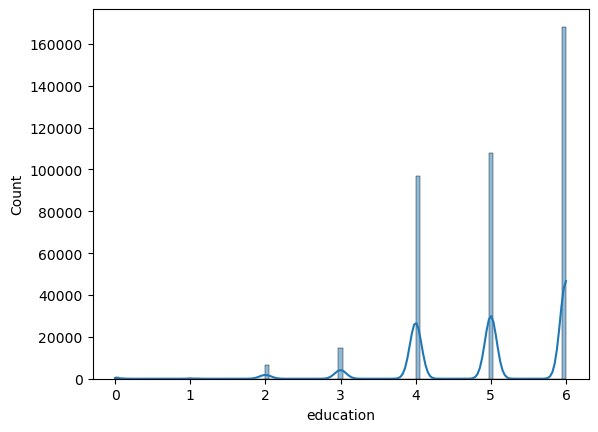

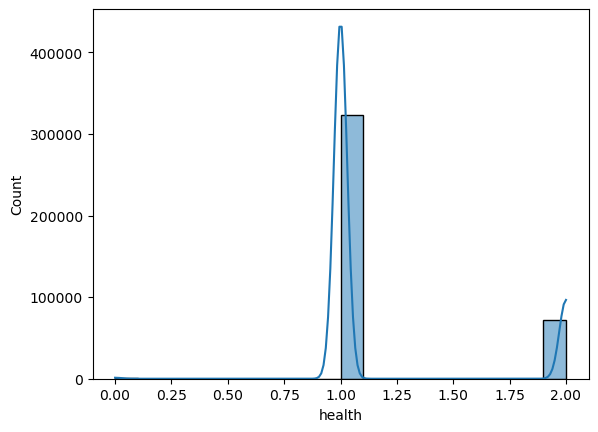

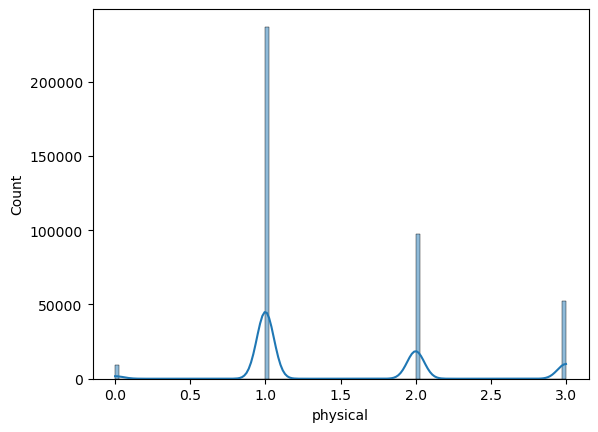

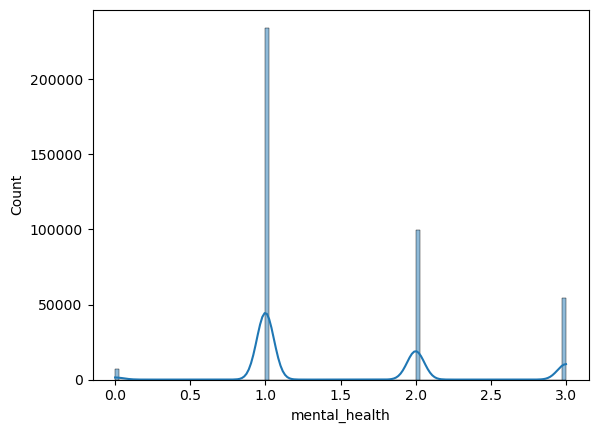

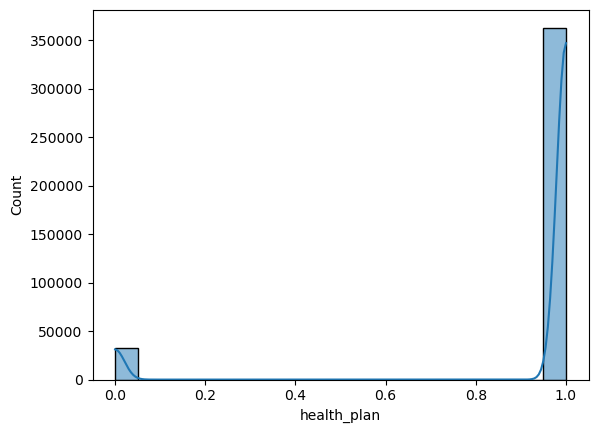

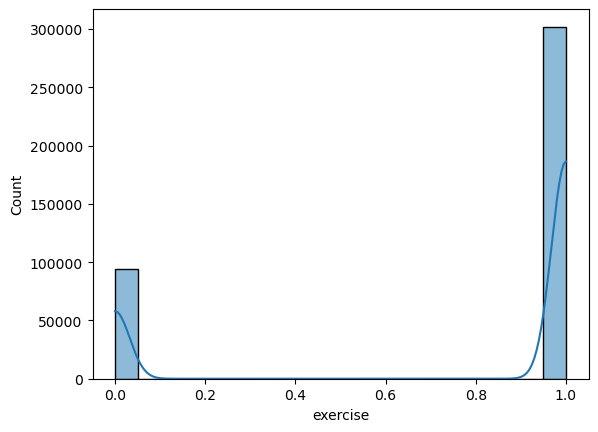

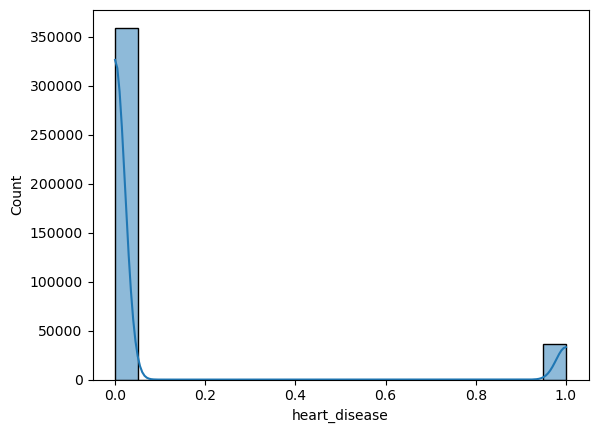

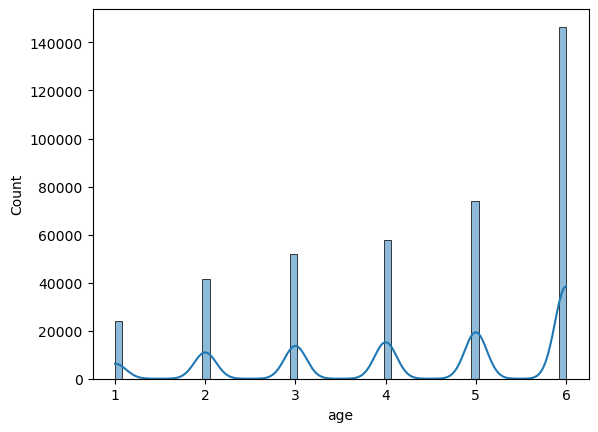

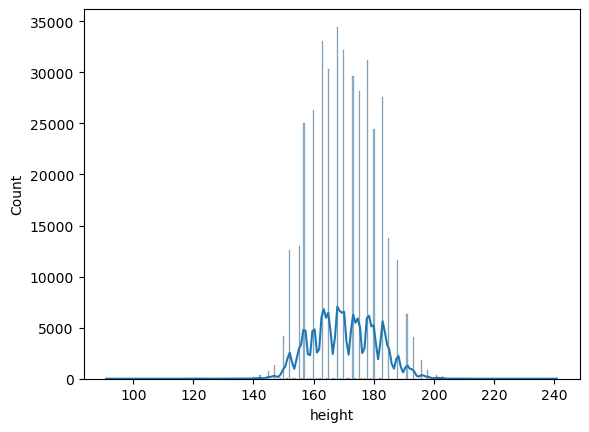

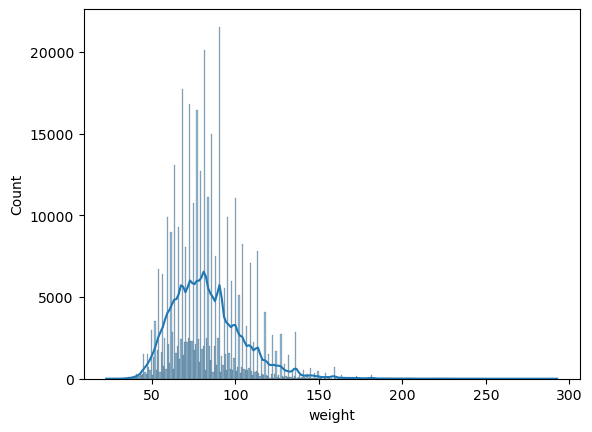

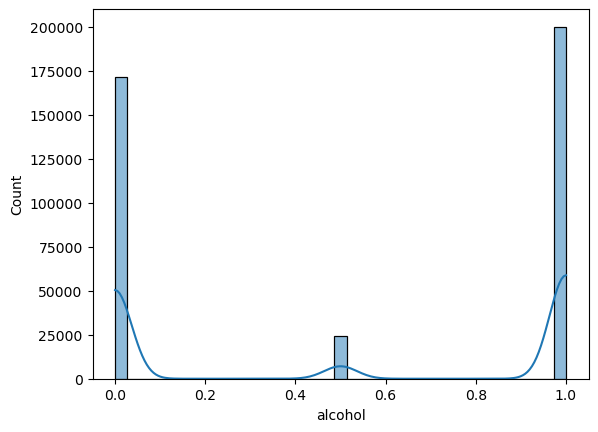

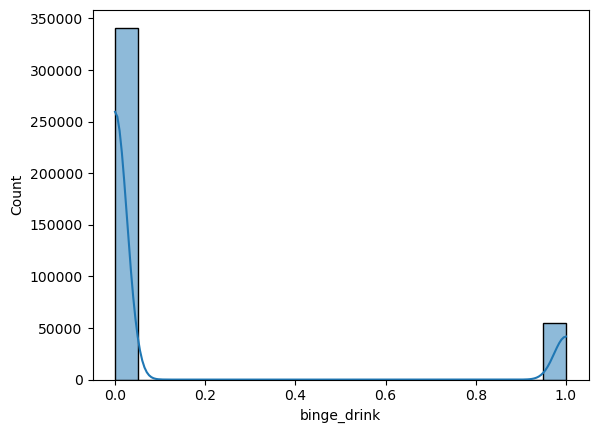

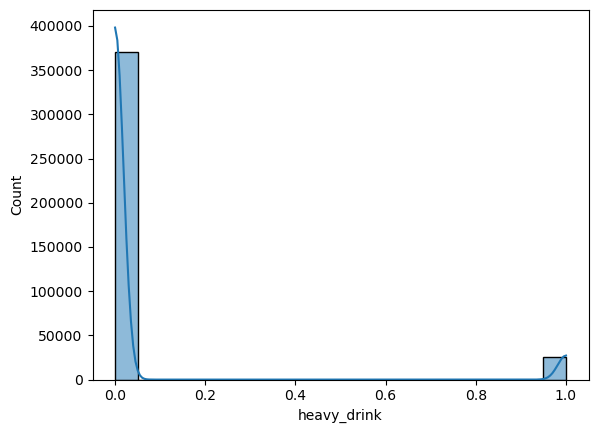

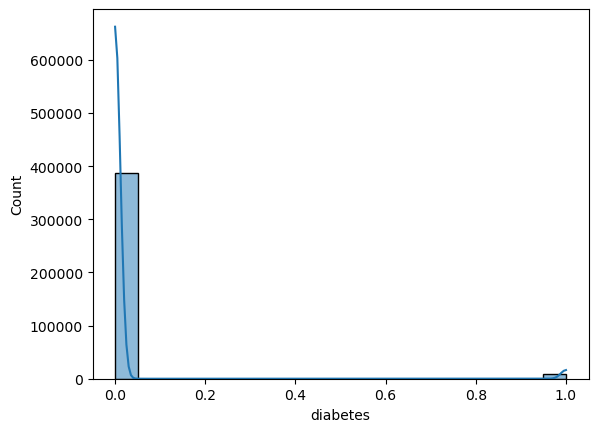

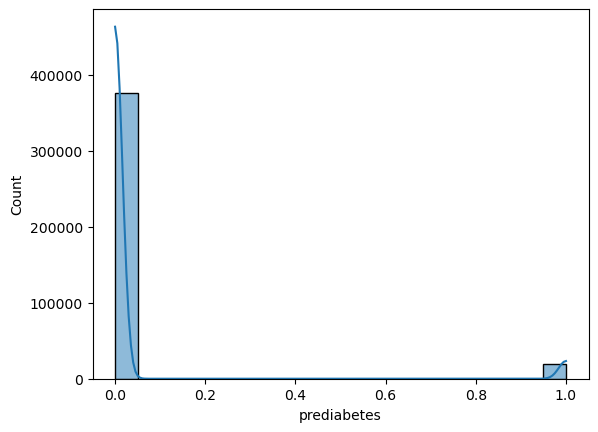

In [26]:
#Numerical columns

numerical = data[['education','health','physical','mental_health','health_plan','exercise','heart_disease','age',
                 'height','weight','alcohol','binge_drink','heavy_drink','diabetes','prediabetes']]


def plot_num(x):
    for column in x.columns:
        sns.histplot(x[column], kde=True)
        plt.show()

plot_num(numerical)

In [27]:
correlations = numerical.corr()
correlations

,education,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,alcohol,binge_drink,heavy_drink,diabetes,prediabetes
education,1.000000,-0.194808,-0.057722,-0.016513,0.178529,0.205182,-0.063530,0.018096,0.079772,-0.023083,0.183449,0.018111,0.012074,-0.027521,-0.002404
health,-0.194808,1.000000,0.409261,0.195536,-0.024927,-0.248661,0.210387,0.109425,-0.058296,0.104903,-0.154863,-0.053818,-0.022747,0.084917,0.026228
physical,-0.057722,0.409261,1.000000,0.291170,0.017898,-0.175037,0.131651,0.033934,-0.043674,0.073920,-0.081885,-0.022495,-0.010273,0.047469,0.022242
mental_health,-0.016513,0.195536,0.291170,1.000000,-0.023765,-0.055775,-0.001074,-0.243821,-0.052399,0.029748,0.020294,0.081586,0.050516,-0.007306,0.008128
health_plan,0.178529,-0.024927,0.017898,-0.023765,1.000000,0.038420,0.032181,0.164651,-0.003072,0.018735,0.038456,-0.024358,-0.007896,0.016748,0.021296
exercise,0.205182,-0.248661,-0.175037,-0.055775,0.038420,1.000000,-0.101864,-0.110739,0.092362,-0.085249,0.156382,0.059441,0.017965,-0.060853,-0.015500
heart_disease,-0.063530,0.210387,0.131651,-0.001074,0.032181,-0.101864,1.000000,0.217622,0.015339,0.047078,-0.086132,-0.065025,-0.028600,0.071942,0.023887
age,0.018096,0.109425,0.033934,-0.243821,0.164651,-0.110739,0.217622,1.000000,-0.106696,-0.041420,-0.118915,-0.222633,-0.049616,0.093860,0.064660
height,0.079772,-0.058296,-0.043674,-0.052399,-0.003072,0.092362,0.015339,-0.106696,1.000000,0.470978,0.123334,0.111783,0.025863,-0.001111,-0.022662
weight,-0.023083,0.104903,0.073920,0.029748,0.018735,-0.085249,0.047078,-0.041420,0.470978,1.000000,0.004691,0.042761,-0.015792,0.075966,0.063146


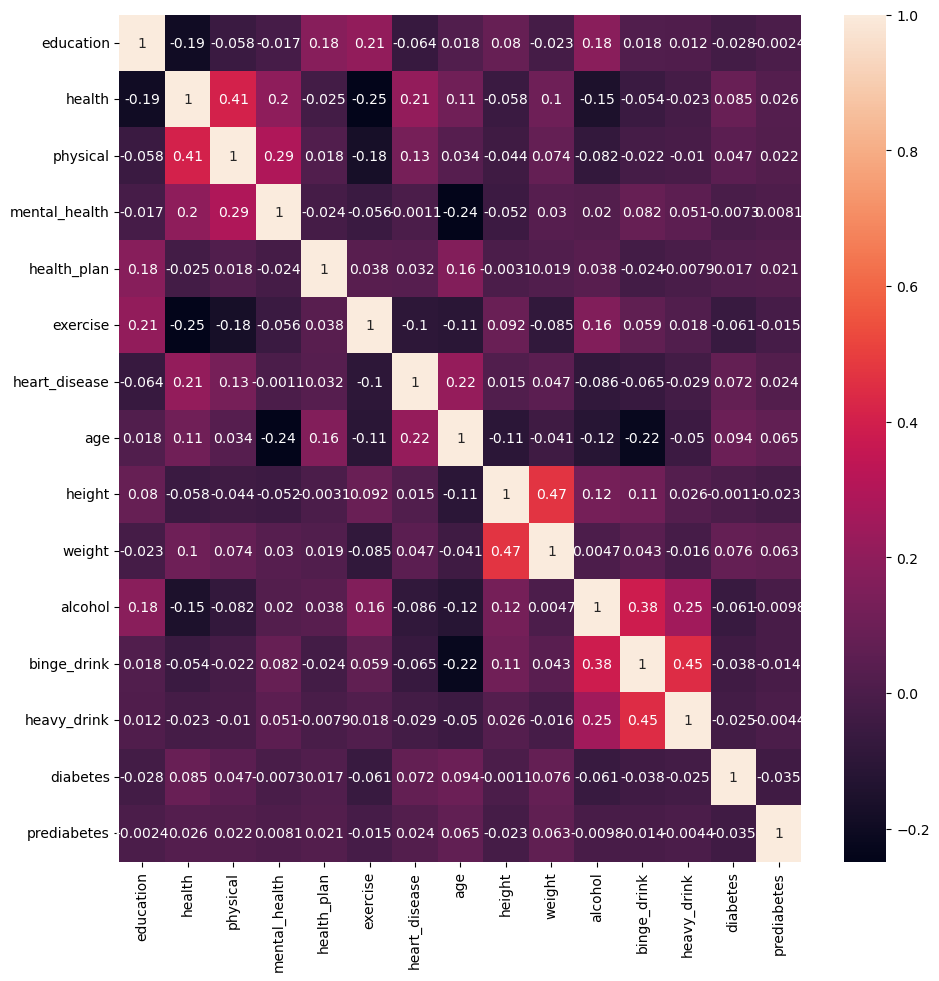

In [28]:
fig, ax=plt.subplots(figsize=(11,11))
ax=sns.heatmap(correlations, annot=True)
plt.show()

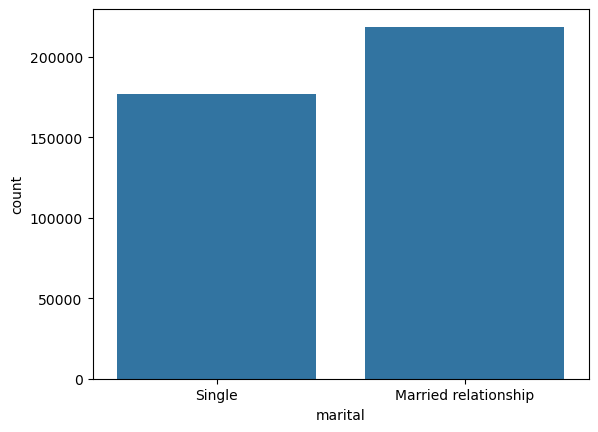

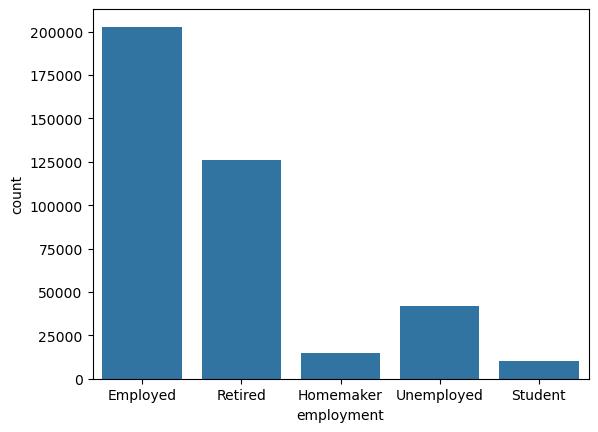

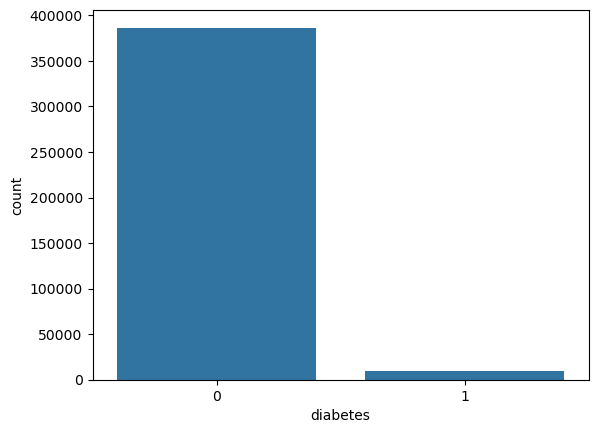

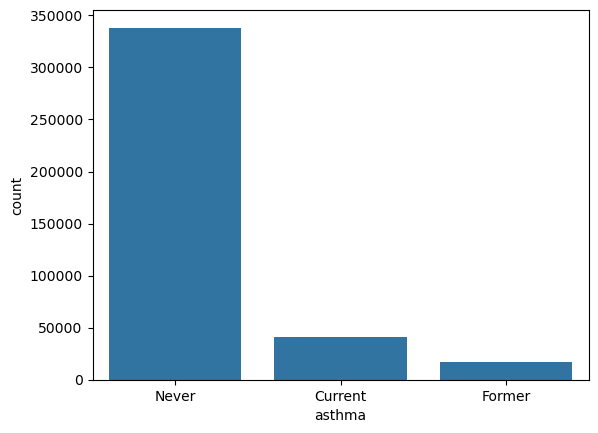

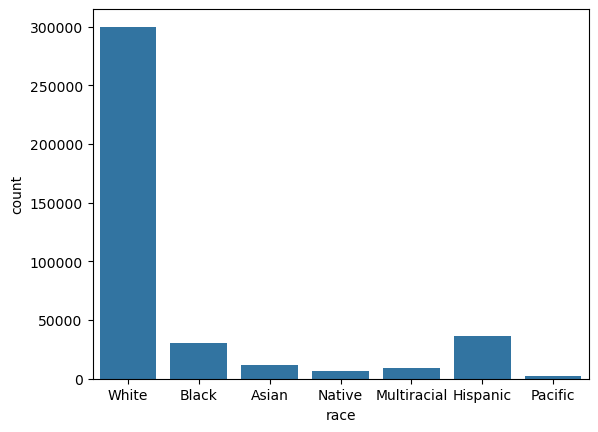

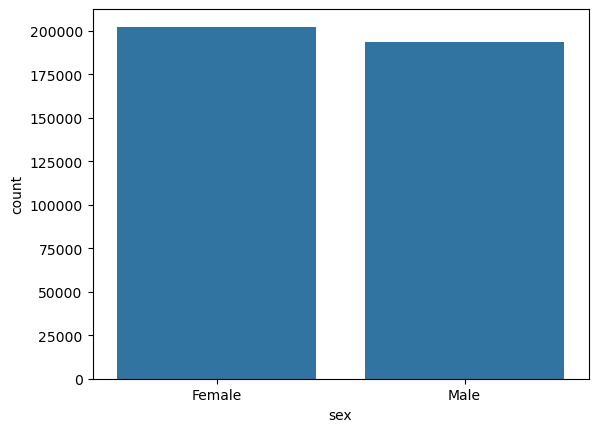

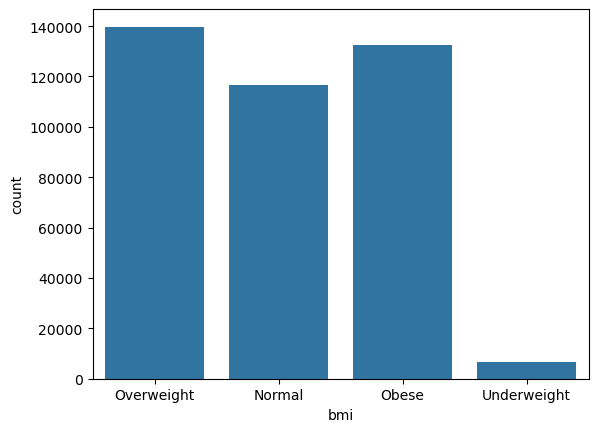

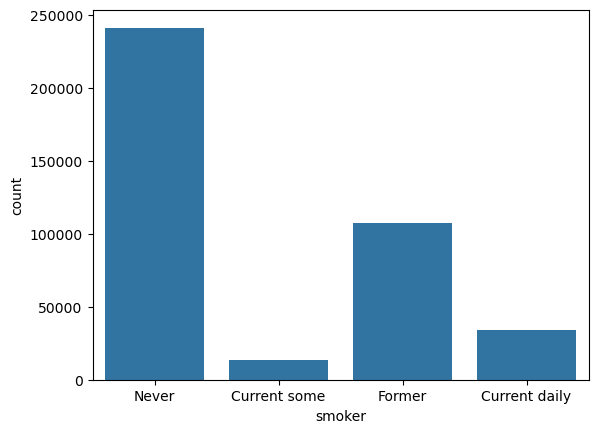

In [29]:
#Splitting
categorical = data[['marital','employment', 'diabetes', 'asthma','race','sex','bmi','smoker']]

def cntplot_cat(df):
    for column in df.columns:
        sns.countplot(x=df[column])
        plt.show()
    return None
   

cntplot_cat(categorical)

### Train-Test Split

In [30]:
data.dtypes

state             object
marital           object
education        float64
employment        object
diabetes           int64
prediabetes      float64
health           float64
physical         float64
mental_health    float64
health_plan      float64
exercise         float64
heart_disease    float64
asthma            object
race              object
sex               object
age              float64
height           float64
weight           float64
bmi               object
income           float64
smoker            object
alcohol          float64
binge_drink        int64
heavy_drink        int64
dtype: object

In [31]:
# Build X and y
y = data['diabetes']
X = data.drop(['diabetes'], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (316705, 23)
y_train shape is: (316705,)
X_test shape is: (79177, 23)
y_test shape is: (79177,)


In [34]:
# split numericals and categoricals

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [35]:
X_train_num.head()

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink
348287,5.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,168.0,90.7,6.0,0.0,0,0
266709,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,173.0,49.9,1.0,0.0,0,0
201619,6.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,185.0,113.4,6.0,1.0,1,0
303571,4.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,6.0,160.0,45.4,0.0,1.0,0,0
82278,6.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,178.0,106.6,5.0,1.0,0,0


In [36]:
X_train_cat.head()

,state,marital,employment,asthma,race,sex,bmi,smoker
348287,Texas,Married relationship,Retired,Never,White,Female,Obese,Former
266709,New York,Single,Unemployed,Never,White,Female,Underweight,Current daily
201619,Minnesota,Married relationship,Employed,Never,White,Male,Obese,Former
303571,Oklahoma,Single,Retired,Never,White,Female,Underweight,Never
82278,Georgia,Single,Employed,Never,White,Male,Obese,Never


In [37]:
# scale numericals
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

# Normalizing data
transformer = MinMaxScaler().fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled.head()

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink
0,0.833333,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.8,0.513333,0.244386,0.857143,0.0,0.0,0.0
1,0.500000,0.0,0.5,0.333333,0.333333,1.0,0.0,0.0,0.2,0.546667,0.091692,0.142857,0.0,0.0,0.0
2,1.000000,1.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.4,0.626667,0.329341,0.857143,1.0,1.0,0.0
3,0.666667,0.0,1.0,0.000000,0.333333,1.0,0.0,1.0,1.0,0.460000,0.074850,0.000000,1.0,0.0,0.0
4,1.000000,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.8,0.580000,0.303892,0.714286,1.0,0.0,0.0


In [38]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
# Note: in version 1.0 and higher of sklearn this method is called 'get_feature_names_out()'
# we will reuse encoder and cols when encoding the X_test_cat
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()

,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Columbia Dist,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Guam,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisina,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississipi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hempshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennysylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,marital_Single,employment_Homemaker,employment_Retired,employment_Student,employment_Unemployed,asthma_Former,asthma_Never,race_Black,race_Hispanic,race_Multiracial,race_Native,race_Pacific,race_White,sex_Male,bmi_Obese,bmi_Overweight,bmi_Underweight,smoker_Current some,smoker_Former,smoker_Never
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
print(X_train_scaled.shape)
print(onehot_encoded.shape)

(316705, 15)
(316705, 73)


In [40]:
X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)
X_train_treated.shape
X_train_treated = X_train_treated.reset_index()

In [41]:
X_train_treated.shape
X_train_treated = X_train_treated.drop('index',axis=1)
X_train_treated.head()

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Columbia Dist,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Guam,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisina,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississipi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hempshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennysylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,marital_Single,employment_Homemaker,employment_Retired,employment_Student,employment_Unemployed,asthma_Former,asthma_Never,race_Black,race_Hispanic,race_Multiracial,race_Native,race_Pacific,race_White,sex_Male,bmi_Obese,bmi_Overweight,bmi_Underweight,smoker_Current some,smoker_Former,smoker_Never
0,0.833333,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.8,0.513333,0.244386,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.500000,0.0,0.5,0.333333,0.333333,1.0,0.0,0.0,0.2,0.546667,0.091692,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,1.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.4,0.626667,0.329341,0.857143,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.0,1.0,0.000000,0.333333,1.0,0.0,1.0,1.0,0.460000,0.074850,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.000000,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.8,0.580000,0.303892,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [42]:
y_train = y_train.reset_index()
y_train = y_train.drop('index',axis=1)
y_train.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [43]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(max_iter=300)
classification.fit(X_train_treated, y_train)

/Users/vidhya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=300)

In [44]:
X_test_num.head()

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink
69999,5.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,5.0,170.0,68.0,3.0,1.0,0,0
254407,4.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0,6.0,170.0,90.7,4.0,1.0,0,0
66608,6.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,173.0,75.8,5.0,1.0,0,1
290254,4.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,191.0,90.7,5.0,1.0,0,0
47690,6.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,4.0,150.0,72.6,7.0,1.0,0,0


In [45]:
# apply scaler to X_test_num
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head(30)

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink
0,0.833333,0.0,0.5,0.333333,0.666667,1.0,1.0,0.0,0.8,0.526667,0.159431,0.428571,1.0,0.0,0.0
1,0.666667,1.0,0.5,0.000000,1.000000,1.0,1.0,0.0,1.0,0.526667,0.244386,0.571429,1.0,0.0,0.0
2,1.000000,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,1.0,0.546667,0.188623,0.714286,1.0,0.0,1.0
3,0.666667,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.4,0.666667,0.244386,0.714286,1.0,0.0,0.0
4,1.000000,0.0,0.5,0.666667,1.000000,1.0,1.0,0.0,0.6,0.393333,0.176647,1.000000,1.0,0.0,0.0
5,0.833333,0.0,0.5,0.333333,0.333333,1.0,0.0,0.0,0.8,0.526667,0.142590,0.714286,0.0,0.0,0.0
6,1.000000,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,1.0,0.593333,0.074850,0.714286,1.0,0.0,0.0
7,1.000000,1.0,0.5,0.333333,0.666667,1.0,1.0,0.0,0.2,0.426667,0.174775,0.000000,1.0,0.0,0.0
8,1.000000,0.0,0.5,0.333333,0.666667,1.0,1.0,0.0,0.2,0.460000,0.144461,0.571429,1.0,0.0,0.0
9,0.666667,0.0,0.5,0.333333,0.333333,1.0,0.0,0.0,0.6,0.406667,0.115269,0.285714,0.0,0.0,0.0


In [46]:
# apply encoder to X_test_cat
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test.head()

,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Columbia Dist,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Guam,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisina,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississipi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hempshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennysylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,marital_Single,employment_Homemaker,employment_Retired,employment_Student,employment_Unemployed,asthma_Former,asthma_Never,race_Black,race_Hispanic,race_Multiracial,race_Native,race_Pacific,race_White,sex_Male,bmi_Obese,bmi_Overweight,bmi_Underweight,smoker_Current some,smoker_Former,smoker_Never
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [47]:
# combine scaled and onehot_encoded portions of X_test
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)
X_test_treated.shape

(79177, 88)

In [48]:
X_test_treated = X_test_treated.reset_index()
X_test_treated = X_test_treated.drop('index',axis=1)
X_test_treated.head()

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Columbia Dist,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Guam,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisina,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississipi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hempshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennysylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,marital_Single,employment_Homemaker,employment_Retired,employment_Student,employment_Unemployed,asthma_Former,asthma_Never,race_Black,race_Hispanic,race_Multiracial,race_Native,race_Pacific,race_White,sex_Male,bmi_Obese,bmi_Overweight,bmi_Underweight,smoker_Current some,smoker_Former,smoker_Never
0,0.833333,0.0,0.5,0.333333,0.666667,1.0,1.0,0.0,0.8,0.526667,0.159431,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.666667,1.0,0.5,0.000000,1.000000,1.0,1.0,0.0,1.0,0.526667,0.244386,0.571429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,1.0,0.546667,0.188623,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.666667,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.4,0.666667,0.244386,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,0.5,0.666667,1.000000,1.0,1.0,0.0,0.6,0.393333,0.176647,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
y_test = y_test.reset_index()
y_test = y_test.drop('index',axis=1)
y_test.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [50]:
predictions = classification.predict(X_test_treated)
predictions
classification.score(X_test_treated, y_test)

0.9759147227098779

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[77052,   228],
       [ 1679,   218]])

In [52]:
#Data is HEAVILY imbalanced.    

from sklearn.utils import resample


# oversampling / undersampling is only to be done on the TRAINING set
# our test set still must reflect reality!
train = pd.concat([X_train_treated, y_train],axis=1)
train.shape

(316705, 89)

In [53]:
no_diabetes = train[train['diabetes']==0]
yes_diabetes = train[train['diabetes']==1]

In [54]:
display(no_diabetes.shape)
display(yes_diabetes.shape)

(309086, 89)

(7619, 89)

In [55]:
# oversample minority
yes_diabetes_oversampled = resample(yes_diabetes, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_diabetes),#<- make both sets the same size
                                    random_state=10)

In [56]:
# both sets are now of a reasonable size
display(no_diabetes.shape)
display(yes_diabetes_oversampled.shape)
yes_diabetes_oversampled.head(20)

(309086, 89)

(309086, 89)

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Columbia Dist,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Guam,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisina,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississipi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hempshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennysylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,marital_Single,employment_Homemaker,employment_Retired,employment_Student,employment_Unemployed,asthma_Former,asthma_Never,race_Black,race_Hispanic,race_Multiracial,race_Native,race_Pacific,race_White,sex_Male,bmi_Obese,bmi_Overweight,bmi_Underweight,smoker_Current some,smoker_Former,smoker_Never,diabetes
51613,0.500000,0.0,1.0,0.666667,0.666667,1.0,0.0,0.0,1.0,0.593333,0.465195,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
302519,0.500000,0.0,0.5,0.333333,0.333333,0.0,0.0,0.0,0.2,0.440000,0.210329,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
189569,1.000000,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,1.0,0.546667,0.278443,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
53642,0.666667,0.0,1.0,0.333333,0.333333,1.0,1.0,1.0,1.0,0.426667,0.159431,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
141079,0.833333,0.0,0.5,0.333333,0.666667,1.0,1.0,0.0,0.8,0.480000,0.224177,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
302417,1.000000,0.0,1.0,0.666667,0.333333,1.0,1.0,1.0,1.0,0.613333,0.261228,0.428571,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
46638,0.333333,0.0,1.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.513333,0.278443,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0

In [57]:
train_oversampled = pd.concat([no_diabetes,yes_diabetes_oversampled],axis=0)
train_oversampled.head()

,education,prediabetes,health,physical,mental_health,health_plan,exercise,heart_disease,age,height,weight,income,alcohol,binge_drink,heavy_drink,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Columbia Dist,state_Connecticut,state_Delaware,state_Florida,state_Georgia,state_Guam,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisina,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississipi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hempshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennysylvania,state_Puerto Rico,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,marital_Single,employment_Homemaker,employment_Retired,employment_Student,employment_Unemployed,asthma_Former,asthma_Never,race_Black,race_Hispanic,race_Multiracial,race_Native,race_Pacific,race_White,sex_Male,bmi_Obese,bmi_Overweight,bmi_Underweight,smoker_Current some,smoker_Former,smoker_Never,diabetes
0,0.833333,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.8,0.513333,0.244386,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0.500000,0.0,0.5,0.333333,0.333333,1.0,0.0,0.0,0.2,0.546667,0.091692,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.000000,1.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.4,0.626667,0.329341,0.857143,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,0.666667,0.0,1.0,0.000000,0.333333,1.0,0.0,1.0,1.0,0.460000,0.074850,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,1.000000,0.0,0.5,0.333333,0.333333,1.0,1.0,0.0,0.8,0.580000,0.303892,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [58]:
y_train_over = train_oversampled['diabetes'].copy()
X_train_over = train_oversampled.drop('diabetes',axis = 1).copy()

In [59]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [60]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_treated)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.17029018466296733
recall:  0.9868212967843965
f1:  0.2904577191621412


/Users/vidhya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
confusion_matrix(y_test,pred)

array([[68159,  9121],
       [   25,  1872]])

In [62]:
y_train.isna().sum()

diabetes    0
dtype: int64

In [63]:
#!pip install imbalanced-learn
# this used to be !pip install imblearn
from imblearn.over_sampling import SMOTE

# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_treated,y_train)

X_train_SMOTE.shape

(618172, 88)

In [64]:

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=300)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_treated)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

/Users/vidhya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precision:  0.17909143855562026
recall:  0.9725882973115445
f1:  0.30248381014837283


/Users/vidhya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[68823,  8457],
       [   52,  1845]])

### Models

In [66]:
# Define function to run all models
def models_automation(models, X_tr, y_tr,X_te, y_te):
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

In [67]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_treated, y_train,X_test_treated, y_test)

LinearRegression: Train -> 0.12784125368724975, Test -> 0.12675434559305843


/Users/vidhya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor: Train -> 0.12660432479478967, Test -> 0.12548834134113962


KeyboardInterrupt: 

In [ ]:
X_train_treated.isna().sum()

In [ ]:
y_train.isna().sum()

In [ ]:
X_test_treated.isna().sum()

### Saving Data

1. Save to CSV
2. Save to SQL
3. Read from SQL

In [ ]:
#Saving to CSV
data.to_csv("diabetes.csv", index=False)

In [ ]:
import pymysql
from sqlalchemy import create_engine
import getpass # To get the password without showing the input
password = getpass.getpass("Please enter the SQL database password: ")

In [ ]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost'
engine = create_engine(connection_string)

In [ ]:
with engine.begin() as connection:
  data.to_sql(name='diabetes_data', con=connection, schema='diabetes_cdc', if_exists='append', index=False)

In [ ]:
sql_data = pd.read_sql_query('SELECT * FROM diabetes_cdc.diabetes_data', engine)
sql_data.head() 

### Hypothesis Testing

1. There is a significant association between age and the prevalence of diabetes among adults.
2. Explore whether there's a gender-based difference in diabetes rates.
3. Is there is a relationship between physical activity levels and the prevalence of diabetes.
4. Is there is a higher prevalence of diabetes among individuals with comorbid conditions (e.g., hypertension or obesity).


In [ ]:
import scipy.stats
from scipy.stats import ttest_1samp

In [ ]:
#Hypothesis 1: There is a significant association between age and the prevalence of diabetes among adults.
#H0: The average age of individuals with diabetes is <=45-54 (Age range 4 is 45-54)
#H1: The average age of individuals with diabetes is >45

# Split the dataset into two groups based on diabetes status
diabetes_group = data[data['diabetes'] == 1]['age']
no_diabetes_group = data[data['diabetes'] == 0]['age']

hypothetical_mean_age = 4

stat, pval = ttest_1samp(diabetes_group, hypothetical_mean_age)

In [ ]:
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

#THe p value is 0 which means the null hypothesis is wrong. the mean age is likely between 55 to 64

In [ ]:
#Hypothessis 2: Explore whether there's a gender-based difference in diabetes rates
#H0: There is no association with gender and diabetes 
#H1: There is a signifcant association with gender and diabetes

contingency_table = pd.crosstab(data['sex'], data['diabetes'])

# Perform chi-square test
chi2_stat, p_value, _, _ = scipy.stats.chi2_contingency(contingency_table)

# Output the chi-square statistic and p-value
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

#Conclusion: There doesn't seem to be any strong correlation between gender and diabetes

In [ ]:
contingency_table

In [ ]:
#Hypothesis 3: Is there is a relationship between physical activity levels and the prevalence of diabetes?

import statsmodels.api as sm

X = sm.add_constant(data['exercise'])
y = data['diabetes']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the regression results
print(result.summary())

In [ ]:
#Given the low value of p, it seems that exercise and diabetes do not have a strong correlation



In [ ]:
#chi2 H0: The two variables are independent of each other
#H1: There is a strong relation between the BMI and diabetes

# Create a contingency table
contingency_table = pd.crosstab(data['bmi'], data['diabetes'])

# Perform chi-square test
chi2_stat, p_value, _, _ = scipy.stats.chi2_contingency(contingency_table)

# Output the chi-square statistic and p-value
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

#Conclusion: As the p value is 0, the null hypothesis is not valid. This suggests there is a strong relation between
#BMI and diabetes

In [ ]:
contingency_table

In [ ]:
diab_data = data.copy()

In [ ]:
diab_data.head()

In [ ]:
ct = pd.crosstab(data['state'], data['diabetes'])

In [ ]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='Diabetes Vs Income', bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
ct

In [68]:
ct = pd.crosstab(data['state'], data['diabetes'])

In [ ]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='Diabetes Vs State', bbox_to_anchor=(1, 1.02), loc='upper left')

In [69]:
ct

diabetes,0,1
state,,
Alabama,4208,0
Alaska,5271,0
Arizona,9170,0
Arkansas,4649,0
California,9463,0
Colorado,8380,0
Columbia Dist,2880,0
Connecticut,8199,0
Delaware,3090,459
